In [ ]:
#Visualize coco predictions

In [ ]:
# !tail -n 1 runs/test/export-preds/best_overall_predictions.json

In [ ]:
!ls /nvmefs1/andrew.mendez/coco/images/val2017/ | grep 298251

In [1]:
import json
from PIL import Image,ImageDraw
import os
from models.models import *
from utils.datasets import *
from utils.general import *

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
def extract_unique_image_ids(json_data):
    """Extracts all unique image_ids from the json data."""
    return set([int(i['image_id']) for i in json_data])

def filter_annotations_by_image_id(image_id, json_data):
    """Filters annotations for a given image_id."""
    return [item for item in json_data if item['image_id'] == image_id]

def get_image_annotations(image_id, directory, json_data):
    """Returns the filtered list of annotations for a given image_id and the image path."""
    filtered_annotations = filter_annotations_by_image_id(image_id, json_data)
    image_path = os.path.join(directory, f'{str(image_id).zfill(5)}.png')
    return filtered_annotations, image_path

In [10]:
names=['vehicle','person']

# res = json.load(open('runs/test/yolov4-pacsp-export-22/best_overall_predictions.json','r'))
res = json.load(open('c','r'))
unique = list(extract_unique_image_ids(res))

# def plot_pred(im_id,path, json):
#     f_anns, image_path = get_image_annotations(im_id,path,json)

#     image = Image.open(image_path)

#     draw = ImageDraw.Draw(image)
#     # Optional: Load a font, if you want a specific font or size
#     # font = ImageFont.truetype("arial.ttf", 15)  # Example: Arial, size 15
#     for box in f_anns:
#         # print(box['score'])
#         if box['score']> 0.4:
#             x, y, w, h = box['bbox']
#             draw.rectangle([x, y, x + w, y + h], outline="red")

#             # Prepare the text to display
#             text = f"ID: {names[box['category_id']]}, Score: {box['score']:.2f}"

#             # Draw text. If you loaded a font, add `, font=font` in the text() function
#             draw.text((x, y), text, fill="yellow")
#     return image
def plot_predictions(image_id, image_directory, annotations_json, threshold=0.4):
    """
    Visualizes object detection predictions on an image.
    
    Args:
        image_id (int): The unique identifier for the image.
        image_directory (str): Path to the directory containing the images.
        annotations_json (list of dict): The JSON data containing the annotations.
        threshold (float): The score threshold for displaying annotations.

    Returns:
        PIL.Image: Image with drawn annotations.
    """
    filtered_annotations, image_path = get_image_annotations(image_id, image_directory, annotations_json)

    # Check if the image file exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found at {image_path}")

    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Optional: Load a font for text display
    # font = ImageFont.truetype("arial.ttf", 15)  # Replace with the path to your font file

    for annotation in filtered_annotations:
        if annotation['score'] > threshold:
            x, y, w, h = annotation['bbox']
            draw.rectangle([x, y, x + w, y + h], outline="red")

            # Prepare the text to display
            text = f"ID: {names[annotation['category_id']]}, Score: {annotation['score']:.2f}"

            # Draw text with or without a custom font
            draw.text((x, y), text, fill="yellow")  # Add `, font=font` if using a custom font

    return image


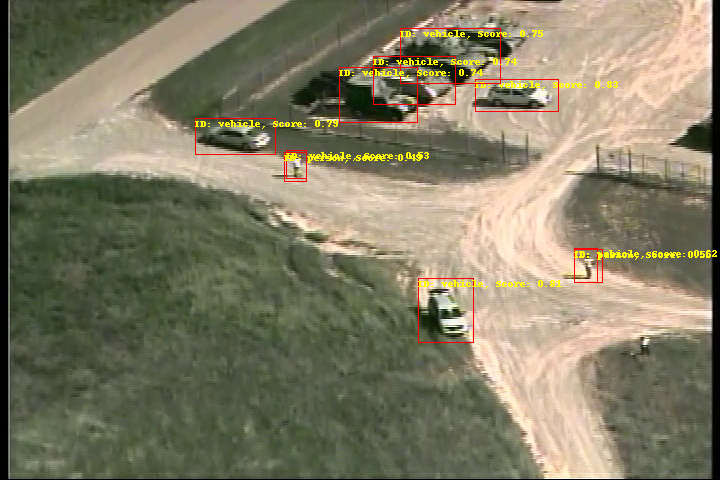

In [15]:
plot_predictions(unique[4000],'/nvmefs1/andrew.mendez/fmv_vid/frames/',res)

In [ ]:

!ls /nvmefs1/andrew.mendez/fmv_vid/frames/